Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)|

# Part 4


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Construct a CNN using Keras.models.Sequential (with the following configuration: C32, C64,
C64, F64, F10. All three convolutions layers are 3×3. Max pooling (2×2) follows each convolution layer.
Use SDG (with momentum) with a batch size of 50 and CategoricalCrossentropy as the loss.

(a) How many learnable parameters are there in this network?

(b) Report the parameters such as the learning rate and momentum.

(c) Report training and testing loss and accuracies.


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (32,32,3)),
                    MaxPooling2D(pool_size=2),
                    Conv2D(64, kernel_size = 3, activation = 'relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(64, kernel_size = 3, activation = 'relu'),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels,batch_size=50, epochs=100, 
                    validation_data=(test_images, test_labels),
                    callbacks=[
                               EarlyStopping(monitor='val_accuracy', min_delta=0.005, 
                                             patience=4, verbose=1, mode='auto',
                                             restore_best_weights=True)])

Epoch 1/100
1000/1000 [==============================] - 16s 4ms/step - loss: 2.0044 - accuracy: 0.2502 - val_loss: 1.3799 - val_accuracy: 0.5011
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3413 - accuracy: 0.5195 - val_loss: 1.2256 - val_accuracy: 0.5699
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1502 - accuracy: 0.5928 - val_loss: 1.0866 - val_accuracy: 0.6201
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0246 - accuracy: 0.6412 - val_loss: 1.0426 - val_accuracy: 0.6339
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9282 - accuracy: 0.6747 - val_loss: 0.9816 - val_accuracy: 0.6576
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8439 - accuracy: 0.7064 - val_loss: 0.9384 - val_accuracy: 0.6722
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7856 - accuracy: 0.7240 - val_loss: 0.9447 - val_a

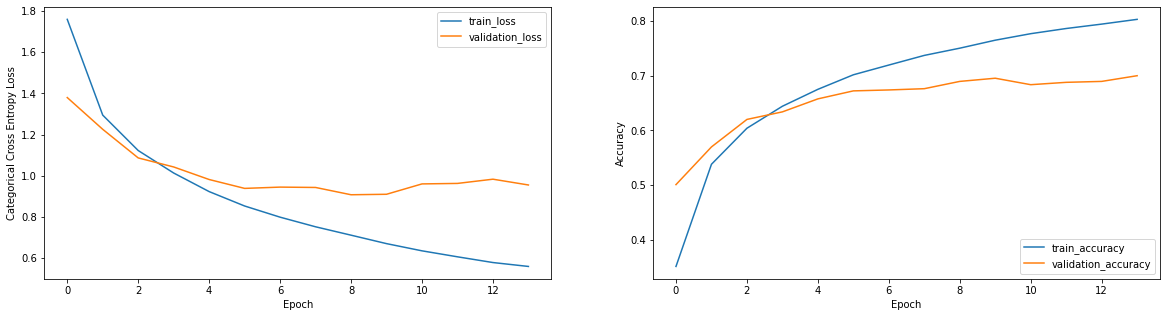

In [12]:
fig,axes = plt.subplots(1,2,figsize=(20,5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label = 'validation_loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross Entropy Loss')
axes[0].legend(loc='upper right')

axes[1].plot(history.history['accuracy'], label='train_accuracy')
axes[1].plot(history.history['val_accuracy'], label = 'validation_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right');

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

my_model = Sequential([Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (32,32,3)),
                    Conv2D(32, kernel_size = 3, activation = 'relu',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.2),

                    Conv2D(64, kernel_size = 3, activation = 'relu', padding='same'),
                    Conv2D(64, kernel_size = 3, activation = 'relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.3),

                    Conv2D(128, kernel_size = 3, activation = 'relu', padding='same'),
                    Conv2D(128, kernel_size = 3, activation = 'relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.4),

                    Flatten(),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.6),
                    Dense(10, activation='softmax')])
my_model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

my_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

my_history = my_model.fit(train_images, train_labels,batch_size=50, epochs=100, 
                    validation_data=(test_images, test_labels),
                    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, 
                                                 verbose=1,patience=2, min_lr=0.001),
                               EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=10, 
                                             verbose=1, mode='auto', restore_best_weights=True)])



Epoch 1/100
1000/1000 [==============================] - 9s 8ms/step - loss: 2.5782 - accuracy: 0.2219 - val_loss: 1.6983 - val_accuracy: 0.3779
Epoch 2/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.6965 - accuracy: 0.3782 - val_loss: 1.5499 - val_accuracy: 0.4357
Epoch 3/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.5256 - accuracy: 0.4447 - val_loss: 1.4230 - val_accuracy: 0.4788
Epoch 4/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.4186 - accuracy: 0.4858 - val_loss: 1.2455 - val_accuracy: 0.5483
Epoch 5/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.2998 - accuracy: 0.5336 - val_loss: 1.1265 - val_accuracy: 0.5961
Epoch 6/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.1827 - accuracy: 0.5778 - val_loss: 1.1439 - val_accuracy: 0.5896
Epoch 7/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.1083 - accuracy: 0.6041 - val_loss: 0.9520 - val_ac

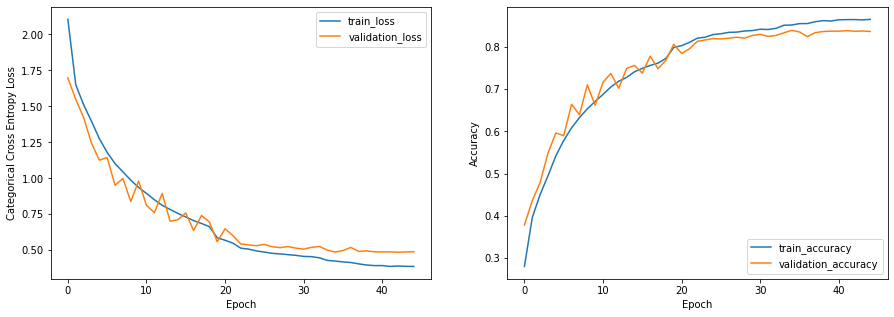

In [9]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].plot(my_history.history['loss'], label='train_loss')
axes[0].plot(my_history.history['val_loss'], label = 'validation_loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross Entropy Loss')
axes[0].legend(loc='upper right')

axes[1].plot(my_history.history['accuracy'], label='train_accuracy')
axes[1].plot(my_history.history['val_accuracy'], label = 'validation_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right');